In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
import seaborn as sns

from encodings.aliases import aliases
%matplotlib inline

# Prieskumná analýza dataset 027
## Extrakcia dát
### Na základe rozboru sme sa rozhodli pre jednotný encoding utf-8

In [289]:
files = ["027/user.csv", "027/session.csv", "027/product.csv"]
codecs = set(aliases.values())
successful_encodings = {file: set() for file in files}

for file in files:
    for encoding in codecs:
        try:
            df=pd.read_csv(file, nrows=10, encoding=encoding, sep='\t')
            successful_encodings[file].add(encoding)
        except:
            pass

common_encodings = list(set.intersection(*successful_encodings.values()))
#common_encodings

In [290]:
users = pd.read_csv("027/user.csv", encoding="utf_8", sep='\t')
sessions = pd.read_csv("027/session.csv", encoding="utf_8", sep='\t')
products = pd.read_csv("027/product.csv", encoding="utf_8", sep='\t')

# Základný opis dát spolu s ich charakteristikami
## Súbor user.csv
Obsahuje 2572 riadkov a 11 nasledovných stĺpcov:
* birthdate - dátum narodenia
* residence - bydlisko 
* name - skutočné meno
* username - užívateľské meno
* race - rasa obsahujúca hodnoty (nan, 'indian', 'asian', 'unspecified', 'black', 'white')
* job - povolanie
* mail - mailová adresa
* user_id - id u_int užívateľa, po bližšom rozbore však zisťuje, že obsahuje duplikátne hodnoty
* sex - pohlavie nadobúda hodnoty ('F', nan, 'M')
* address - adresa užívateľa

In [291]:
users

,birthdate,residence,registration,name,username,race,job,mail,user_id,sex,address
0,NaN,"2482 Alyssa Shores\nToniport, NJ 41252",2014-02-25,Michael Anderson,bookerstephanie,NaN,NaN,james99@hotmail.com,610,NaN,"015 Morris Causeway\nStevenville, VT 13901"
1,1931-05-19,NaN,2014/10/14,近藤 幹,inoueyosuke,NaN,薬剤師,yoshidayoko@gmail.com,1833,NaN,三重県匝瑳市吾妻橋37丁目16番3号 長間コート908
2,NaN,NaN,28 Oct 2017,Jason Meyers,leah02,indian,NaN,brent21@yahoo.com,342,M,"1286 Alexander Spring\nNorth Madelinestad, RI ..."
3,2019-08-06,NaN,05 Apr 2019,Antje Seip,hilmar39,asian,NaN,ybeer@web.de,270,F,Daniele-Siering-Straße 71\n85322 Stade
4,NaN,NaN,2019/08/10,Ester Becker,casparbernard,NaN,NaN,sthanel@yahoo.de,1455,F,Stollstraße 040\n85829 Apolda
...,...,...,...,...,...,...,...,...,...,...,...
2567,NaN,NaN,2018-09-19,RNDr. Alžběta Holubová Th.D.,zdenkamachova,NaN,NaN,mvlckova@post.cz,441,F,Na Poustkách 790\n786 18 Rožmberk nad Vltavou
2568,1931-10-03,宮崎県横浜市港北区元浅草19丁目10番14号,20 Oct 2016,橋本 春香,hiroshi22,asian,NaN,hiroshi59@hotmail.com,1069,F,広島県夷隅郡大多喜町日本堤11丁目9番16号
2569,NaN,NaN,2019-02-07,Stephanie Stanley,laura24,NaN,NaN,hwilkinson@hotmail.com,632,NaN,"854 Stephanie Spurs\nPort Tiffany, MO 00512"
2570,2021-10-07,NaN,2018-03-01,Alexandra Kabus-Wende,xhornig,NaN,NaN,annyhiller@gmx.de,89,F,Diethard-Geißler-Platz 784\n86945 Kemnath


In [292]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   birthdate     1415 non-null   object
 1   residence     900 non-null    object
 2   registration  2572 non-null   object
 3   name          2572 non-null   object
 4   username      2572 non-null   object
 5   race          772 non-null    object
 6   job           1029 non-null   object
 7   mail          2572 non-null   object
 8   user_id       2572 non-null   int64 
 9   sex           1286 non-null   object
 10  address       2186 non-null   object
dtypes: int64(1), object(10)
memory usage: 221.2+ KB


#### Hodnoty, ktoré môže nadobúdať stĺpec race

In [293]:
users['race'].unique().tolist()

[nan, 'indian', 'asian', 'unspecified', 'black', 'white']

#### Hodnoty, ktoré môže nadobúdať stĺpec sex

In [294]:
users['sex'].unique().tolist()

[nan, 'M', 'F']

#### Stĺpce, ktoré môžu nadobúdať nan hodnoty sú

In [295]:
nan_columns = users.columns[users.isna().any()].tolist()
nan_columns

['birthdate', 'residence', 'race', 'job', 'sex', 'address']

In [296]:
users.describe()

,user_id
count,2572.000000
mean,1280.906687
std,734.900255
min,1.000000
25%,646.750000
50%,1274.500000
75%,1933.250000
max,2570.000000


In [297]:
users.describe(include='object')

,birthdate,residence,registration,name,username,race,job,mail,sex,address
count,1415,900,2572,2572,2572,772,1029,2572,1286,2186
unique,1394,900,2373,2523,2542,5,620,2565,2,2186
top,1985-11-04,"2482 Alyssa Shores\nToniport, NJ 41252","03/30/2018, 00:00:00",伊藤 花子,fduarte,unspecified,Fachinformatiker,btakahashi@gmail.com,F,"015 Morris Causeway\nStevenville, VT 13901"
freq,2,1,3,3,2,227,8,3,665,1


### Identifikácia problémov v dátach s navrhnutým riešením
* birthdate je v rozličných formátoch, takže ho bude treba uceliť
* residence a address obsahujú \n, \r, ktoré nahradíme za ' ' pre lepšiu čitateľnosť
* race a sex obsahuju hodnotu nan pre jednotnosť vymeníme za unspecified

Je dôležité podotknúť, že skutočne unikátnych user_id je síce 1639 avšak užívatelia, ktorí majú rovnaké user_id sa nezhodujú, keďže unikátnych emailových adries je 2565


#### Pridanie správneho formátu času

In [298]:
users.birthdate = pd.to_datetime(users.birthdate, format='mixed')
users.registration = pd.to_datetime(users.registration, format='mixed')

#### Zlepšenie čitateľnosti adresy a bydliska

In [299]:
users.address = users.address.str.replace('\n', ' ')
users.address = users.address.str.replace('\r', ' ')
users.residence = users.residence.str.replace('\n', ' ')
users.address = users.address.str.replace('\r', ' ')

#### Zistili sme, že sa medzi rasami a pohlaviami sa vyskytuju hodnoty nan, tak ich nahradíme s unspecified

In [300]:
users.race = users.race.replace(np.nan, 'unspecified')

In [301]:
users.sex = users.sex.replace(np.nan, 'unspecified')

#### Napriek tomu, že sú kontá, ktoré majú rovnaký email užívatelia sa nezhodujú v menách, tak sme sa rozhodli ich ponechať
#### redundantných mailov je

#### redundantných mailov je

In [302]:
duplicate_emails = users[users.duplicated(subset=['mail'], keep=False)]
distinct_duplicate_emails = duplicate_emails['mail'].unique()

len(duplicate_emails) - len(distinct_duplicate_emails)

7

#### Opakujúce mailové adresy sú

In [303]:
list(distinct_duplicate_emails)

['btakahashi@gmail.com',
 'yosuke94@hotmail.com',
 'qpereira@uol.com.br',
 'salmeida@uol.com.br',
 'suzukiyosuke@gmail.com',
 'gruzicka@post.cz']

In [304]:
for email, group in duplicate_emails.groupby('mail'):
    if group['name'].nunique() == 1:
        print(group)

### Pomocné grafy pre opísanie dôležitých atribútov z user.csv
Stĺpce, ktoré nás budú pri formulovaní hypotéz zaujímať sú 
* race - tendencie užívateľov interagovať s webom na základe rasy
* sex - správanie sa bude tiež odlišovať na základe pohlavia, ktoré má vyššie zastúpenie ako rasy a teda poskytuje viacej dát
* birthdate - vek užívateľa bude hrať jednoznačne kľúčovú rolu
* registration - pomocou dátumu registrácie je možné zistiť ako dlho už užívateľ interaguje s webom  

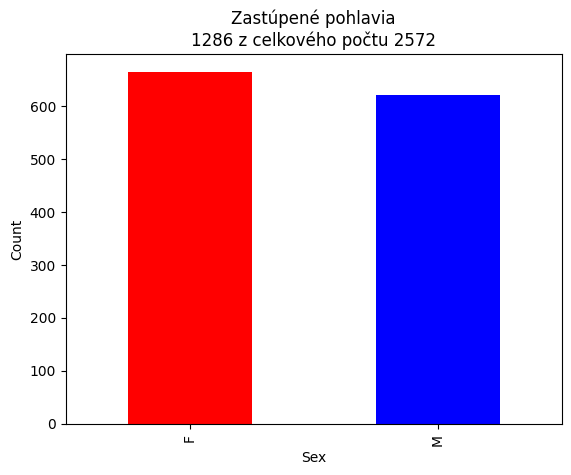

In [305]:
filtered_users = users[users['sex'] != 'unspecified']
ax = filtered_users['sex'].value_counts().plot(kind='bar', color=['red', 'blue'])
ax.set_title(f'Zastúpené pohlavia\n{filtered_users.shape[0]} z celkového počtu {users.shape[0]}')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.show()

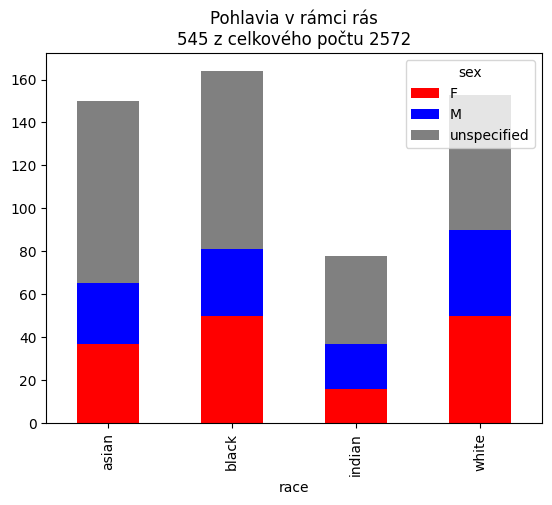

In [306]:
filtered_users = users[users['race'] != 'unspecified']
cross_table = pd.crosstab(index=filtered_users["race"], columns=filtered_users["sex"])
ax = cross_table.plot.bar(stacked=True, color=['red', 'blue', 'grey'])
ax.set_title(f'Pohlavia v rámci rás\n{filtered_users.shape[0]} z celkového počtu {users.shape[0]}')
plt.show()

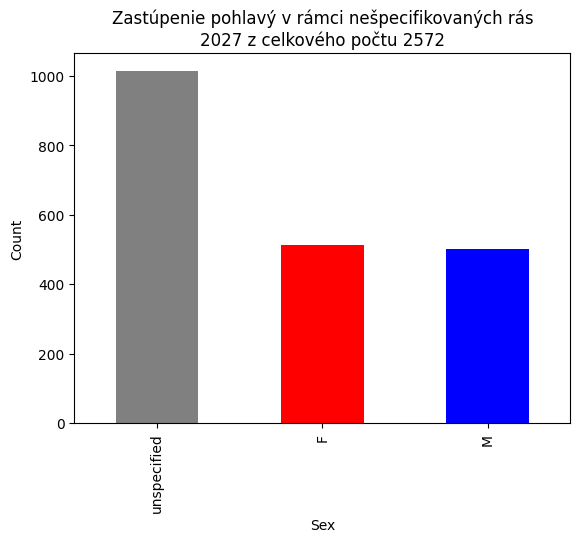

In [307]:
filtered_users = users[users['race'] == 'unspecified']
ax = filtered_users['sex'].value_counts().plot(kind='bar', color=['grey', 'red', 'blue'])
ax.set_title(f'Zastúpenie pohlavý v rámci nešpecifikovaných rás\n{filtered_users.shape[0]} z celkového počtu {users.shape[0]}')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.show()

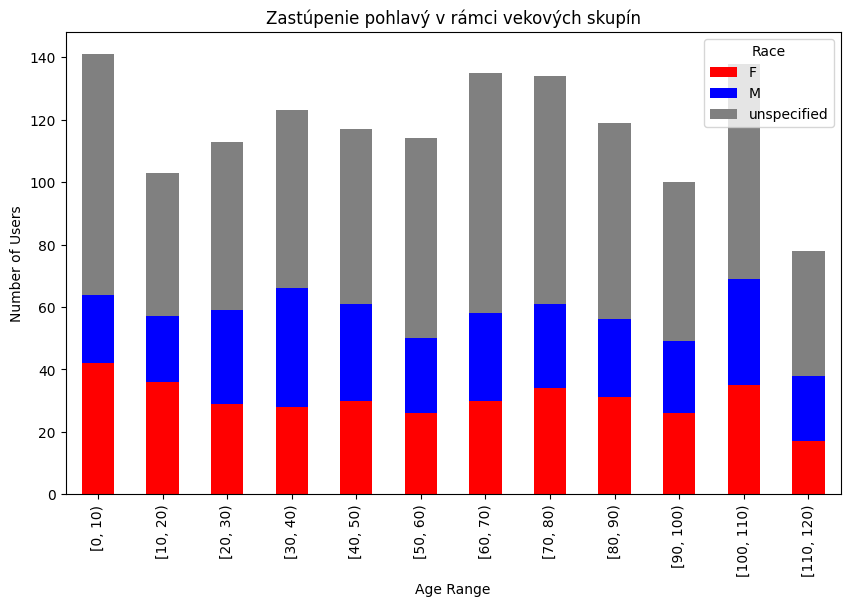

In [308]:
# pridaj column vek
current_year = pd.Timestamp.now().year
users['age'] = current_year - users['birthdate'].dt.year

# vypocitaj distribuciu po 10
age_bins = [i * 10 for i in range(13)]
age_distribution = pd.cut(users['age'], bins=age_bins, right=False).value_counts().sort_index()

crosstab = pd.crosstab(pd.cut(users['age'], bins=age_bins, right=False), users['sex'])

ax = crosstab.plot.bar(stacked=True, figsize=(10, 6), color=['red', 'blue', 'grey'])
plt.title('Zastúpenie pohlavý v rámci vekových skupín')
plt.xlabel('Age Range')
plt.ylabel('Number of Users')
plt.legend(title='Race')
plt.show()

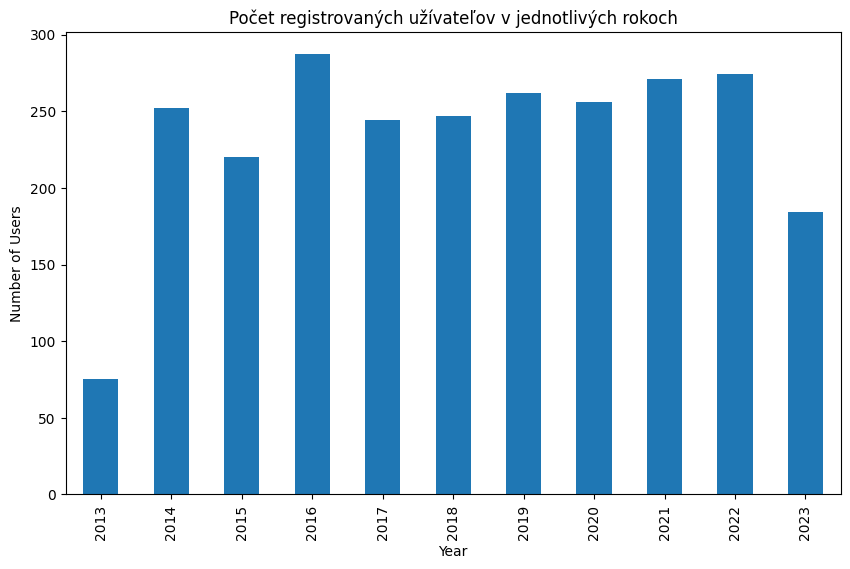

In [309]:
user_counts = users['registration'].dt.year.value_counts().sort_index()

# Step 4: Create a bar chart
user_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Počet registrovaných užívateľov v jednotlivých rokoch')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.show()

## Súbor session.csv
Obsahuje 11059 riadkov a 25 nasledovných stĺpcov, ktoré sa dajú rozdeliť do kategórií

### Premenné potrebné pre prepojenie s ostatnými súbormi
* product_ean - čiarový kód produktu
* user_id - užívateľské id
* session_id - dôležitý záznam o id konkrétnej session

### Popis sedenia (session)
* browser_name - názov webového prehliadača nadobúdajúci hodnoty ('other', 'edge', 'chrome', 'firefox', 'safari', 'opera', 'mobile')
* screen_height - výška obrazovky
* screen_width - šírka obrazovky
* pct_scrandom - záznamy o rýchlom presúvaní na stránke
* total_load_time - celkový čas potrebný na načítanie stránky
* session_duration - trvanie sedenia
* session_start - začiatok sedenia

### Pomer počtu interakcií daného typu k celkovému počtu nasobený bázovou hodnotou
* pct_scroll_move_duration - normonovaná hodnota na celkový čas rolovania
* pct_click_product_inormationf - záznamy o klikaní na informácie produktuo
* pct_cckli - záznamy o klikaní používateľack
* pct_rageick_cl - záznamy o zúrivom kliknutí na stránkeick
* pct_momoveuse_ - záznamy o pohybe myšm* pct_wild_mouse - záznamy o rýchlom pohybe myši
* pct_scroll_move - záznamy o rolovaní
* pct_doubleclick - záznamy o dvojitom klikaní myšou 
* pct_input - záznamy o zadávaní vstupov používateľom
* pct_mouse_click - záznamy o klikaní myškou

### Interakcie počas sed
ove
* wild_mouse_dur - trvanie rýchleho pohybu myši
* scroll_move_total_rel_distance - normalizovaná na výšku a šírku obrazovky
* page_activity_duration - trvanie aktivity používateľa na stránke
* mouse_move_total_rel_distance - normalizovaná na výšku a šírku obrazovky

### Kľúčový atribút ack
* ack - či nakúpil užívateľ produkt, anie 2565

In [310]:
sessions

,pct_scroll_move_duration,pct_click_product_info,pct_click,pct_rage_click,pct_mouse_move,wild_mouse_duration,pct_wild_mouse,session_id,scroll_move_total_rel_distance,product_ean,...,session_duration,pct_doubleclick,ack,session_start,user_id,mouse_move_total_rel_distance,pct_input,screen_width,browser_name,pct_mouse_click
0,8.85488,43.64091,8.98795,40.67262,12.05233,10.92406,40.31171,631257,12.11598,6055136974989,...,89.75126,10.95194,0.0,2021-11-14 18:41:59,973,7.26770,0.07011,1024,other,11.58339
1,5.51742,46.12390,9.49791,51.51026,12.40687,9.49005,43.79400,189788,5.36070,8394513754102,...,182.38368,11.22674,0.0,2023-06-05 02:49:55,1944,10.85288,0.01634,1280,other,13.61084
2,8.14823,48.82215,11.86306,65.56987,12.75475,11.24635,65.01636,241847,9.45548,3151508632051,...,131.88025,12.45882,0.0,2020-10-04 22:26:54,211,12.81383,0.09676,1366,edge,10.08739
3,7.55270,31.00850,13.40154,49.76564,12.43207,13.00626,60.59046,1065070,10.61975,1696354183545,...,38.58611,10.43164,0.0,2019-11-04 04:03:38,2268,14.72482,0.55836,1280,chrome,7.63693
4,13.87674,54.07735,13.27578,32.79394,10.07664,13.50254,51.24497,1002613,11.71293,2095486426558,...,160.03964,11.49121,1.0,2022-04-29 19:17:17,776,11.43008,0.91849,1920,chrome,13.02173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,10.59596,56.34633,7.99554,40.65971,14.19494,9.42995,46.50430,786957,12.82270,5823237275196,...,114.70123,13.28359,0.0,2022-10-30 13:16:31,1363,8.34259,0.01521,1920,edge,12.11110
11055,8.54598,68.63714,13.58541,44.14301,12.44711,10.48967,56.85204,1115132,6.56581,5028100499550,...,212.71416,11.91779,0.0,2021-03-05 09:44:27,613,14.29348,0.04540,1920,chrome,11.08003
11056,11.80273,63.18318,12.28004,45.05993,11.93748,13.11262,51.05285,494318,14.19901,9913770431350,...,99.75251,12.18983,0.0,2022-12-30 20:17:34,2231,10.75047,0.62208,800,edge,9.70017
11057,8.39329,14.04450,9.66773,59.98017,9.86632,11.34093,55.54578,316999,10.36205,763513380761,...,199.79640,10.33540,0.0,2021-04-13 20:08:31,743,8.24977,0.10676,1366,opera,11.40967


In [311]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move_duration        11048 non-null  float64
 1   pct_click_product_info          11048 non-null  float64
 2   pct_click                       11047 non-null  float64
 3   pct_rage_click                  11048 non-null  float64
 4   pct_mouse_move                  11048 non-null  float64
 5   wild_mouse_duration             11048 non-null  float64
 6   pct_wild_mouse                  11048 non-null  float64
 7   session_id                      11059 non-null  int64  
 8   scroll_move_total_rel_distance  11048 non-null  float64
 9   product_ean                     11059 non-null  int64  
 10  pct_scrandom                    11047 non-null  float64
 11  total_load_time                 11059 non-null  float64
 12  screen_height                   

In [312]:
sessions.describe()

,pct_scroll_move_duration,pct_click_product_info,pct_click,pct_rage_click,pct_mouse_move,wild_mouse_duration,pct_wild_mouse,session_id,scroll_move_total_rel_distance,product_ean,...,total_load_time,page_activity_duration,pct_scroll_move,session_duration,pct_doubleclick,ack,user_id,mouse_move_total_rel_distance,pct_input,pct_mouse_click
count,11048.000000,11048.000000,11047.000000,11048.000000,11048.000000,11048.000000,11048.000000,1.105900e+04,11048.000000,1.105900e+04,...,11059.000000,11048.000000,11048.000000,11059.000000,11048.000000,11059.000000,11059.000000,11048.000000,11048.000000,11048.000000
mean,10.983494,48.080184,10.807807,48.702596,10.627289,10.801534,50.967452,7.506198e+05,10.130209,4.970423e+12,...,4.014985,10.810794,53.130001,149.885079,10.796134,0.548060,1246.961208,10.811311,0.564632,11.744904
std,2.207290,12.062837,2.199593,13.050580,2.193292,2.168525,13.513747,4.322445e+05,2.552476,2.876884e+12,...,2.846831,1.006538,12.874116,60.353388,0.991117,0.497707,720.148737,2.277776,2.655210,2.083405
min,2.019010,0.000000,4.032290,0.000000,3.487570,4.571430,0.000000,1.154000e+03,0.000000,2.877825e+09,...,0.033800,6.909980,0.000000,-73.360310,7.209090,0.000000,0.000000,3.069870,0.000000,3.534410
25%,9.257585,39.961128,9.105205,40.054873,8.920815,9.070808,41.816698,3.732155e+05,8.487198,2.496572e+12,...,1.927565,10.129622,44.477208,109.381725,10.119910,0.000000,627.000000,9.078160,0.011360,10.577283
50%,11.128930,48.082110,10.930560,48.634015,10.488990,10.596220,50.976495,7.507530e+05,10.001095,4.960334e+12,...,3.366600,10.814900,53.195025,149.907690,10.786860,1.000000,1248.000000,10.784575,0.050890,12.033755
75%,12.698325,56.227897,12.554760,57.312115,12.373005,12.501017,60.127887,1.120525e+06,11.581423,7.412677e+12,...,5.373955,11.492892,61.922035,190.867590,11.463165,1.000000,1863.000000,12.526645,0.337568,13.194527
max,17.886230,100.000000,17.855580,100.000000,17.558760,18.193810,100.000000,1.499946e+06,24.076620,9.998344e+12,...,21.102480,14.634800,100.000000,354.440280,14.793850,1.000000,2499.000000,18.160660,100.000000,19.089670


In [313]:
sessions.describe(include='object')

,screen_height,session_start,screen_width,browser_name
count,11059,11059,11059,11059
unique,7,10926,7,7
top,1080,2021-05-29 17:17:22,1920,edge
freq,2222,2,2213,3353


#### Napriek tomu, že sessions.csv obsahuje duplikátne hodnoty nevadí nám to, pretože môže v rámci jednej session nastať k rovnakým pohybom myškou

In [314]:
nan_columns = sessions.columns[sessions.isna().any()].tolist()
nan_columns

['pct_scroll_move_duration',
 'pct_click_product_info',
 'pct_click',
 'pct_rage_click',
 'pct_mouse_move',
 'wild_mouse_duration',
 'pct_wild_mouse',
 'scroll_move_total_rel_distance',
 'pct_scrandom',
 'page_activity_duration',
 'pct_scroll_move',
 'pct_doubleclick',
 'mouse_move_total_rel_distance',
 'pct_input',
 'pct_mouse_click']

#### Hodnoty, ktoré môže nadobúdať stĺpec browser_name

In [315]:
sessions['browser_name'].unique().tolist()

['other', 'edge', 'chrome', 'firefox', 'safari', 'opera', 'mobile']

### Identifikácia problémov v dátach s navrhnutým riešením
* screen_height - obsahuje 1653 nenumerických záznamov ('lower', 'higher')
* screen_width - obsahuje 1665 nenumerických záznamov ('lower', 'higher')
* session_start je potrebné preconvertovať na dátum

#### Počet záznamov, ktoré nenabúdajú numerickú hodnotu v stĺpcoch screen_weight a screen_width

In [318]:
columns_to_check = ["screen_height", "screen_width"]

non_numeric_counts = {}
for column in columns_to_check:
    numeric_values = pd.to_numeric(sessions[column], errors='coerce')
    
    non_numeric_count = numeric_values.isna().sum()
    non_numeric_counts[column] = non_numeric_count

list(non_numeric_counts.items())

[('screen_height', 1653), ('screen_width', 1665)]

#### Pridanie správneho formátu času

In [319]:
sessions.session_start = pd.to_datetime(sessions.session_start, format='mixed')